## EJERCICIO 9 - PRACTICA 4

### Importo dataset autos.csv

In [ ]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import chardet
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, LeakyReLU



nombre_archivo = DATOS_DIR + 'AUTOS.csv'

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

#-- seleccionar los atributos numéricos --
df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
print(df)

     normalized-losses  wheel-base  length  width  height  curb-weight  \
0                  NaN        88.6   168.8   64.1    48.8         2548   
1                  NaN        88.6   168.8   64.1    48.8         2548   
2                  NaN        94.5   171.2   65.5    52.4         2823   
3                164.0        99.8   176.6   66.2    54.3         2337   
4                164.0        99.4   176.6   66.4    54.3         2824   
..                 ...         ...     ...    ...     ...          ...   
200               95.0       109.1   188.8   68.9    55.5         2952   
201               95.0       109.1   188.8   68.8    55.5         3049   
202               95.0       109.1   188.8   68.9    55.5         3012   
203               95.0       109.1   188.8   68.9    55.5         3217   
204               95.0       109.1   188.8   68.9    55.5         3062   

     engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0            130  3.47    2.68      

 ## Antes de comenzar con el entrenamiento, complete los datos faltantes utilizando el valor promedio.

In [ ]:
# veo cuantos datos faltantes hay y en que COLUMNAS
df.isnull().sum()

,0
normalized-losses,41
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,4
stroke,4
compression-ratio,0


### Se observa que las columnas con datos faltantes son: normalized-losses,  bore, stroke, horsepower, peak-rpm y price

In [ ]:
# El atributo num-of-doors NO ES NUMERICO, hay que numerizarlo para poder calcularle el promedio:
#mapeo = {'num-of-doors': {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6}}

#df.replace(mapeo, inplace=True)
#print(df)

In [ ]:
# para calcular los promedios de las columnas con datos faltantes, debo primero eliminar las filas con datos faltantes
#creo un dataframe auxiliar:
dfAUX = df

# elimino las filas con datos faltantes
dfAUX = dfAUX.dropna()

#verifico que no tenga datos faltantes
dfAUX.isnull().sum()


,0
normalized-losses,0
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,0
stroke,0
compression-ratio,0


In [ ]:
import numpy as np
# calculo el valor promedio de las columnas con datos faltantes (utilizando el dfAUX):
#Average1 = np.mean(dfAUX['num-of-doors'])
Average2 = np.mean(dfAUX['horsepower'])
Average3 = np.mean(dfAUX['price'])
Average4 = np.mean(dfAUX['normalized-losses'])
Average5 = np.mean(dfAUX['bore'])
Average6 = np.mean(dfAUX['stroke'])
Average7 = np.mean(dfAUX['peak-rpm'])

#print('promedio columna num of doors :' , Average1)
print('promedio columna horsepower :' , Average2)
print('promedio columna price :' , Average3)
print('promedio columna normalized-losses :' , Average4)
print('promedio columna bore :' , Average5)
print('promedio columna stroke :' , Average6)
print('promedio columna peak-rpm :' , Average7)

promedio columna horsepower : 95.875
promedio columna price : 11427.68125
promedio columna normalized-losses : 121.3
promedio columna bore : 3.2984375
promedio columna stroke : 3.2373125000000003
promedio columna peak-rpm : 5116.25


In [ ]:
# Reemplazo valores faltantes en el dataframe original

#df['num-of-doors'] = df['num-of-doors'].fillna(Average1)
df['horsepower'] = df['horsepower'].fillna(Average2)
df['price'] = df['price'].fillna(Average3)
df['normalized-losses'] = df['normalized-losses'].fillna(Average4)
df['bore'] = df['bore'].fillna(Average5)
df['stroke'] = df['stroke'].fillna(Average6)
df['peak-rpm'] = df['peak-rpm'].fillna(Average7)
# verifico que ahora el dataframe original no tenga datos faltantes:
df.isnull().sum()

,0
normalized-losses,0
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,0
stroke,0
compression-ratio,0


Genere un modelo utilizando un multiperceptrón para
predecir el precio del auto (atributo price) y la cantidad de millas por galón en ruta (MPG-highway) en
función del resto de los atributos.

### Normalizacion de atributos y valores a predecir

In [ ]:
datos = np.array(df)
normalizarEntrada = 1

################### TENGO DOS VALORES A PREDECIR: mpg-higway y price ####################################
attPred = [12,14] #12 mpg-highway y 14 precio  #-- nro de atributos a predecir
T = datos[:, attPred] # me quedo solo con las columnas 12 y 14 (mpg-highway y precio)
X = np.delete(datos, attPred, 1) # elimina columnas de atributos a predecir

if normalizarEntrada:
    data_scaler, target_scaler = StandardScaler(), StandardScaler()
    X = data_scaler.fit_transform(X)
    T = target_scaler.fit_transform(T)



### Divido dataset en entrenamiento y validacion

In [ ]:
# %% Separa los datos y clase en grupo de entrenamiento y validacion
x_train, x_val, y_train, y_val = train_test_split(X, T, test_size = 0.2,  shuffle = True)


### Construccion del modelo

In [71]:
# cantidad de pasadas de los datos
EPOCAS = 1000
# cantidad de datos a procesar para actualizar pesos
TAM_LOTE = 64

ENTRADAS = X.shape[1]
SALIDAS = len(attPred)

#ACTIVACION = LeakyReLU()
#ACTIVACION = 'relu'
ACTIVACION = 'tanh'
#ACTIVACION = 'sigmoid'

OPTIMIZADOR = 'sgd'
#OPTIMIZADOR = 'rmsprop'
#OPTIMIZADOR = 'adam'
PACIENCIA = 7

model = Sequential()
model.add(Input(shape=(ENTRADAS,)))
model.add(Dense(6, activation=ACTIVACION))
model.add(Dense(3, activation= ACTIVACION))
model.add(Dense(SALIDAS))

model.summary()

# obtiene la arquitectura para el modelo y lo compila
model.compile(optimizer=OPTIMIZADOR, loss='mae', metrics = ['accuracy', 'mae', 'mse'])

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 6)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119 (476.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo con parada temprana ---> realizo 30 ejecuciones independientes

In [72]:
# Inicializo las listas para almacenar las épocas y las pérdidas (errores)
epocas_lista = []
errores_lista = []

#  10 ejecuciones independientes (no hago 30 pq se me bugea toda la compu)
for i in range(10):
    print(f'Ejecución {i+1} de 10')

    # El parámetro patience indica la cantidad de epocas que deben transcurrir sin mejoras en el entrenamiento
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA)

    # Entrena el modelo y guarda la historia del progreso
    history = model.fit(x = x_train, y = y_train, batch_size = TAM_LOTE, epochs = EPOCAS, validation_data = (x_val, y_val), callbacks=[early_stop])

    # Almaceno el número de épocas utilizadas en esta ejecución
    epocas_utilizadas = len(history.epoch)
    epocas_lista.append(epocas_utilizadas)

    # Calculo la pérdida (error) promedio en los datos de validación en esta ejecución
    val_loss_promedio = np.mean(history.history['val_loss'])
    errores_lista.append(val_loss_promedio)

    print(f'Épocas utilizadas: {epocas_utilizadas}')
    print(f'Pérdida promedio de validación: {val_loss_promedio:.5f}')
    print('-' * 80)


# Al final, se calcula el promedio de las épocas y de las pérdidas (errores)
epocas_promedio = np.mean(epocas_lista)
errores_promedio = np.mean(errores_lista)

print(f'\nÉpocas promedio en las 30 ejecuciones: {epocas_promedio:.2f}')
print(f'Error promedio (pérdida de validación) en las 30 ejecuciones: {errores_promedio:.5f}')



  # %% Evalua e informa resultado de entrenamiento, validación y testeo
  # evalua el modelo con los datos de entreanmiento
  #pred = model.evaluate(x_train, y_train, verbose=0)
  #print('\nEfectividad del modelo con datos de entrenamiento para:' )
  #print(" - Accuracy: %6.2f%%" % (pred[1]*100))
  #print(" - Pérdida : %9.5f" % (pred[0]))

  # evalua el modelo con los datos de validacion
  #pred = model.evaluate(x_val, y_val, verbose=0)
  #print('\nEfectividad del modelo con datos de validacion para:' )
  #print(" - Accuracy: %6.2f%%" % (pred[1]*100))
  #print(" - Pérdida : %9.5f" % (pred[0]))


Ejecución 1 de 10
Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.2455 - loss: 1.0371 - mae: 1.0371 - mse: 1.8665 - val_accuracy: 0.2683 - val_loss: 1.0769 - val_mae: 1.0769 - val_mse: 1.9522
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2661 - loss: 1.0201 - mae: 1.0201 - mse: 1.7984 - val_accuracy: 0.2927 - val_loss: 1.0589 - val_mae: 1.0589 - val_mse: 1.9017
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2837 - loss: 0.9778 - mae: 0.9778 - mse: 1.7038 - val_accuracy: 0.2927 - val_loss: 1.0397 - val_mae: 1.0397 - val_mse: 1.8484
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2848 - loss: 0.9361 - mae: 0.9361 - mse: 1.5242 - val_accuracy: 0.3171 - val_loss: 1.0207 - val_mae: 1.0207 - val_mse: 1.7968
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2850 - loss: 0.9671 - mae: 0.9671 - mse: 1.6643 - val_accuracy: 0.3415 - val_loss: 1.0033 - val_mae: 1.0033 - val_mse: 1.7482
Epoch 6/1000
3/3 ━━━━━━━━━

## Graficos con evolucion de curva y accuracy

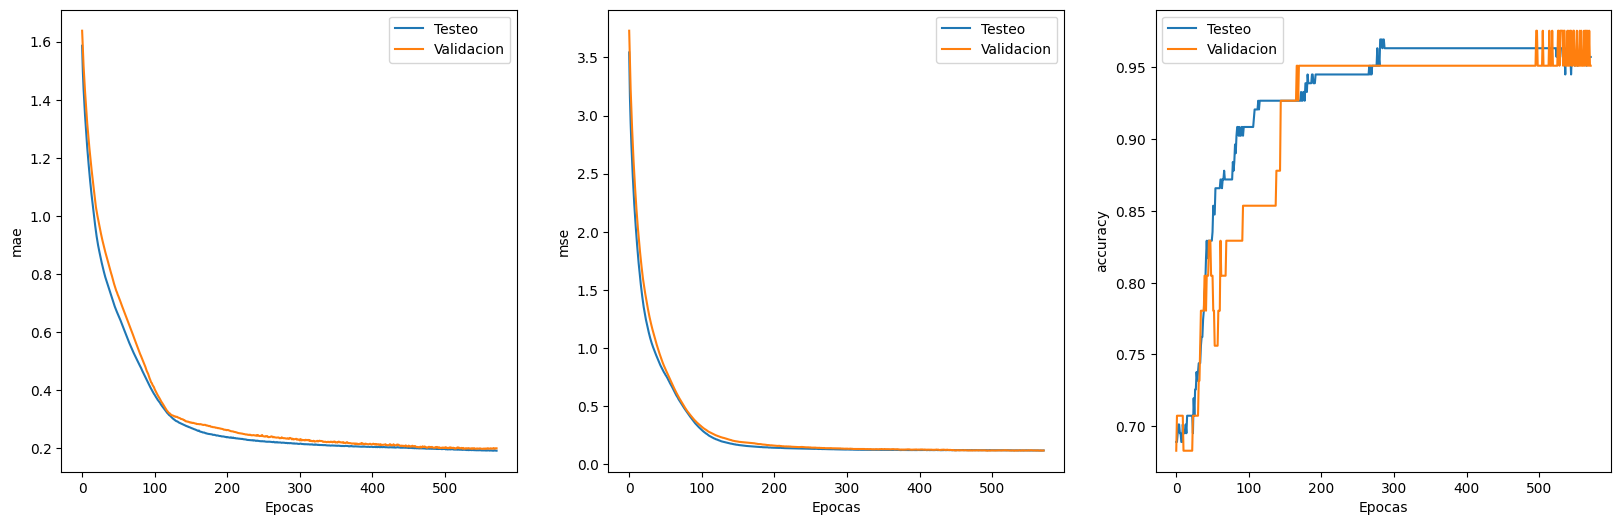

In [ ]:
hist = history.history

def dibujar_curva(axs, value, epocas, hist):
    axs.plot(epocas, hist[value], label='Testeo')
    axs.plot(history.epoch, hist['val_'+value], label = 'Validacion')

    axs.set(xlabel="Epocas", ylabel=value)
    axs.legend()

fig, axs = plt.subplots(1,3, figsize=(20,6))

dibujar_curva(axs[0], 'mae', history.epoch, hist)
dibujar_curva(axs[1], 'mse', history.epoch, hist)
dibujar_curva(axs[2], 'accuracy', history.epoch, hist)

## Calculo epocas promedio y error promedio (para llenar el cuadro)

In [ ]:

#  cantidad de épocas utilizadas
epocas_utilizadas = len(history.epoch)
print('Épocas utilizadas en este entrenamiento: %d' % epocas_utilizadas)

# pérdida promedio (error promedio) en los datos de validación durante el entrenamiento
val_loss_promedio = np.mean(history.history['val_loss'])
print('Error promedio en los datos de validación: %9.5f' % val_loss_promedio)

# Para calcular la media de las épocas a lo largo de múltiples entrenamientos
epocas_lista = []  # Aquí almacenas las épocas de diferentes entrenamientos
epocas_lista.append(epocas_utilizadas)

epocas_promedio = np.mean(epocas_lista)
print('Épocas promedio en múltiples entrenamientos: %9.2f' % epocas_promedio)


**Retroalimentación visual de las predicciones sobre los datos de validación**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[Text(0.5, 0, 'Ejemplo'), Text(0, 0.5, 'Precio del Vehículo')]

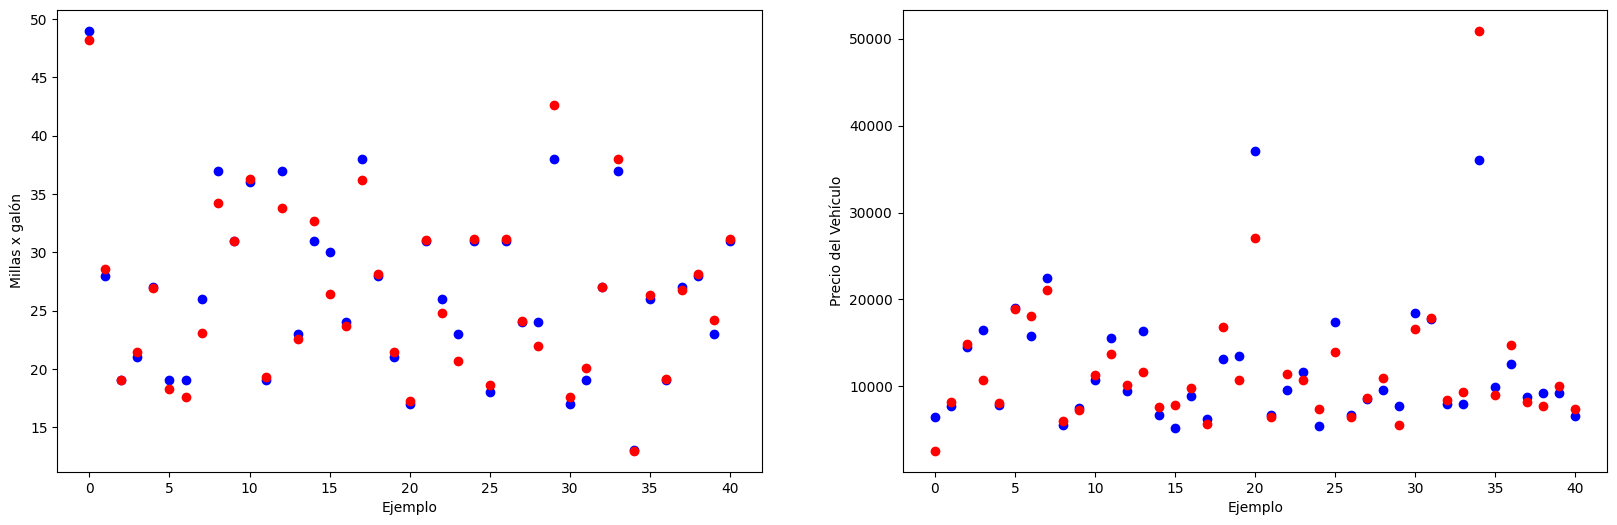

In [ ]:
y_pred = model.predict(x_val)

y_val_no_norm = target_scaler.inverse_transform(y_val)
y_pred_no_norm = target_scaler.inverse_transform(y_pred)

fig, axs = plt.subplots(1,2, figsize=(20,6))

# lista con nro de iteracion
sample = list(range(len(y_val_no_norm)))

axs[0].plot(sample, y_val_no_norm[:,0],  "o", color='blue')
axs[0].plot(sample, y_pred_no_norm[:,0], "o", color='red')
axs[0].set(xlabel='Ejemplo', ylabel='Millas x galón')

axs[1].plot(sample, y_val_no_norm[:,1],  "o", color='blue')
axs[1].plot(sample, y_pred_no_norm[:,1], "o", color='red')
axs[1].set(xlabel='Ejemplo', ylabel='Precio del Vehículo')

# **Analisis de entrenamientos con distintas funciones de activacion y optimizadores:**

### Épocas Promedio: es el número de épocas promedio en el que se detuvo el entrenamiento
### Error Promedio es el promedio del error de predicción en cada entrenamiento


In [ ]:
### creo el cuadro con resultados para completar

resultados = {
    'Optimizador': ['SGD', 'SGD', 'SGD', 'SGD', 'RMSProp', 'RMSProp', 'RMSProp', 'RMSProp', 'Adam', 'Adam', 'Adam', 'Adam'],
    'Función activación': ['tanh', 'sigmoid', 'ReLU', 'LeakyReLU', 'tanh', 'sigmoid', 'ReLU', 'LeakyReLU', 'tanh', 'sigmoid', 'ReLU', 'LeakyReLU'],
    'Iteraciones promedio': [None] * 12,  # Columnas vacías para completar
    'Error Promedio': [None] * 12         # Columnas vacías para completar
}

r = pd.DataFrame(resultados)

# Mostrar el DataFrame
print(r)

   Optimizador Función activación Iteraciones promedio Error Promedio
0          SGD               tanh                 None           None
1          SGD            sigmoid                 None           None
2          SGD               ReLU                 None           None
3          SGD          LeakyReLU                 None           None
4      RMSProp               tanh                 None           None
5      RMSProp            sigmoid                 None           None
6      RMSProp               ReLU                 None           None
7      RMSProp          LeakyReLU                 None           None
8         Adam               tanh                 None           None
9         Adam            sigmoid                 None           None
10        Adam               ReLU                 None           None
11        Adam          LeakyReLU                 None           None


In [74]:
### Completo el cuadro de resultados:

#SGD - tanh
r.at[0, 'Iteraciones promedio'] = 84
r.at[0, 'Error Promedio'] = 0.3

#SGD - sigmoid
r.at[1, 'Iteraciones promedio'] = 16
r.at[1, 'Error Promedio'] = 0.77

#SGD - ReLU
r.at[2, 'Iteraciones promedio'] = 9
r.at[2, 'Error Promedio'] = 0.05

#SGD - LeakyReLU
r.at[3, 'Iteraciones promedio'] = 63.4
r.at[3, 'Error Promedio'] = 0.27
#--------------------------------------

#RMSProp - tanh
r.at[4, 'Iteraciones promedio'] = 62
r.at[4, 'Error Promedio'] = 0.24

#RMSProp - sigmoid
r.at[5, 'Iteraciones promedio'] = 112
r.at[5, 'Error Promedio'] = 0.28

#RMSProp - ReLU
r.at[6, 'Iteraciones promedio'] = 53.5
r.at[6, 'Error Promedio'] = 0.23

#RMSProp - LeakyReLU
r.at[7, 'Iteraciones promedio'] = 27.77
r.at[7, 'Error Promedio'] = 0.2
#---------------------------------------

print(r)

   Optimizador Función activación Iteraciones promedio Error Promedio
0          SGD               tanh                   84            0.3
1          SGD            sigmoid                   16           0.77
2          SGD               ReLU                    9           0.05
3          SGD          LeakyReLU                 63.4           0.27
4      RMSProp               tanh                   62           0.24
5      RMSProp            sigmoid                  112           0.28
6      RMSProp               ReLU                 53.5           0.23
7      RMSProp          LeakyReLU                27.77            0.2
8         Adam               tanh                 None           None
9         Adam            sigmoid                 None           None
10        Adam               ReLU                 None           None
11        Adam          LeakyReLU                 None           None
